In [5]:
# Load our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import string

# Load data
dataSet = pd.read_csv("datasets/final.csv", index_col = [0], low_memory = False)

In [6]:
# How many Datas
print(f"Total Datas: {dataSet.shape}")
Input = int(input("How many Datas you want to analyze: "))

Total Datas: (3169996, 14)
How many Datas you want to analyze: 10000


In [7]:
# Create "StoreName" columns based on StoreCode
def Store_name(value):
    if value == "19 Below":
        return "1"
    elif value == "20~29":
        return "2"
    elif value == "30~39":
        return "3"
    elif value == "40~49":
        return "4"
    else:
        return "5"

In [8]:
# Choose Age
dataSet["AgeCode"] = dataSet["Age"].head(Input).apply(Store_name)

In [9]:
age = ["19 Below", "20~29", "30~39", "40~49", "50 Above"] # label
spend = [0, 0, 0, 0, 0]
count = [0, 0, 0, 0, 0]
average = [0, 0, 0, 0, 0]

data1 = dataSet[(dataSet["AgeCode"] == "1")]
data2 = dataSet[(dataSet["AgeCode"] == "2")]
data3 = dataSet[(dataSet["AgeCode"] == "3")]
data4 = dataSet[(dataSet["AgeCode"] == "4")]
data5 = dataSet[(dataSet["AgeCode"] == "5")]

In [11]:
for i in dataSet["AgeCode"]:
    if i == "1":
        count[0] += 1
        for i in data1["BoxSpending"]:
            spend[0] += int(i)
    elif i == "2":
        count[1] += 1
        for i in data2["BoxSpending"]:
            spend[1] += int(i)
    elif i == "3":
        count[2] += 1
        for i in data3["BoxSpending"]:
            spend[2] += int(i)
    elif i == "4":
        count[3] += 1
        for i in data4["BoxSpending"]:
            spend[3] += int(i)
    elif i == "5":
        count[4] += 1
        for i in data5["BoxSpending"]:
            spend[4] += int(i)
            
spend[0] /= len(data1["BoxSpending"])
spend[1] /= len(data2["BoxSpending"])
spend[2] /= len(data3["BoxSpending"])
spend[3] /= len(data4["BoxSpending"])
spend[4] /= len(data5["BoxSpending"])

In [12]:
# 花費時間取小數點第二位
for i in range(len(spend)):
    spend[i] = round(spend[i], 2)
    
# 平均值取小數第二位
for i in range(len(average)):
    average[i] = spend[i] / count[i]
    average[i] = round(average[i], 2)
print(f"count: {count}")
print(f"spend: {spend}")
print(f"average: {average}")
color = ['r', 'b', 'g', 'y', 'm']

count: [538, 4208, 10746, 3384, 1124]
spend: [272759.22, 5688550.4, 18160226.28, 5938044.41, 1951649.52]
average: [506.99, 1351.84, 1689.95, 1754.74, 1736.34]


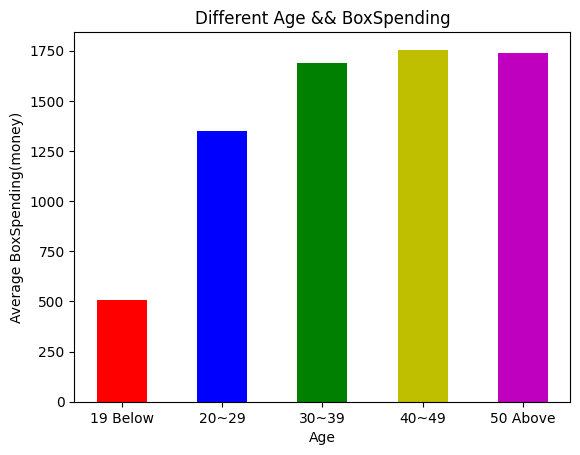

In [13]:
for i in range(0, 5):
    plt.bar(age[i], average[i], color = color[i], width = 0.5)
plt.title("Different Age && BoxSpending")  # title
plt.xlabel("Age")   # x label
plt.ylabel("Average BoxSpending(money)") # y label
plt.show()